# *DATA 606 Project Report*
# <span style="font-family:Arial; font-weight:bold;">**Exploring Customer Dynamics: A Machine Learning Approach to Term Deposit Marketing**</span>

### Table of Contents<font><a class='anchor' id='top'></a>

>[Introduction](#scrollTo=4toWP5MzIWkH)

>>[Project Context](#scrollTo=BhEx8-4VZN3L)

>>[Objective](#scrollTo=GrG6bBOMIdA7)

>[Dataset](#scrollTo=4axyI02rb70n)

>[Explatory Data Analysis (EDA)](#scrollTo=iHsrVlRAo2t_)

>>[Visual EDA](#scrollTo=mJxtmrchh3YT)

>[Data Preprocessing](#scrollTo=WTjK37ronsLZ)

>>[Encoding Ordinal Categorical Features](#scrollTo=ARYjtXebnwO-)

>>[Encoding Nominal Categorical Features](#scrollTo=Q4M18g4cn1Fd)

>>[Final Dataset](#scrollTo=w-el_b-in91l)

>>[Train Test Split](#scrollTo=3I1-pwWyoEFR)

>>[Data Scaling](#scrollTo=5-UXNwZCAlZ4)

>>[Multicollinearity and Normality Test](#scrollTo=f72c682660950716)

>>>[Report on Model Assumption Checks](#scrollTo=b4uClCXb51pQ)

>>>[Multicollinearity Assessment:](#scrollTo=4XXstsQH81AN)

>>>[Normality Check:](#scrollTo=7T4vOOQt8_rD)

>>>[Implications for Model Selection:](#scrollTo=W5tEVB3K9HY0)

>[Building Different Full Classification Models](#scrollTo=PhGwcEX7oL3K)

>>[Logistic Regression](#scrollTo=eRCcJts0oR8g)

>>>[Function to Plot Confusion Matrix](#scrollTo=0ihwYVsFMcqs)

>>>[Model Results](#scrollTo=XzmdZw7_Ocmh)

>>[Random Forest Classifier](#scrollTo=9BmW4lYRoi5C)

>>>[Model Results](#scrollTo=KhC6m4hqOuLp)

>>[Decision Tree Classifier](#scrollTo=Mj9lUZ0IomeP)

>>>[Model Results](#scrollTo=SLBHtoppO3IX)

>>[Generative Model](#scrollTo=R4lc3FBRFqhd)

>>>[Model Results](#scrollTo=1y8YN8OYO-2s)

>>[Linear Discriminant Analysis (LDA)](#scrollTo=7GMbluUVHVl1)

>>>[Model Results](#scrollTo=z_vAw-B5PBnx)

>>[QDA](#scrollTo=8qI9p1-lItwm)

>>>[Model Results](#scrollTo=YoUca5D5PEYM)

>[Comparing the Models](#scrollTo=vbcc_gn0cn7W)

>>>[Comparative Analysis of Predictive Models for Client Subscriptions to Bank Term Deposits](#scrollTo=vbcc_gn0cn7W)

>>[Model Performance Overview:](#scrollTo=Kk0nEuz6GYtI)

>>>[Analysis and Comparison:](#scrollTo=Kk0nEuz6GYtI)

>[The Best Model](#scrollTo=F4wNKruEEBpk)

>>[Random Forest Classifier](#scrollTo=AUNqCvWkRBHm)

>>[Class Balancing](#scrollTo=OWmDlruHWKdP)

>>[Feature Selection (by intuition)](#scrollTo=4cd2839e81a34210)

>>[Results](#scrollTo=7AMor2MoWu-I)

>>[Tuning Random Forest](#scrollTo=0YV-uBY1Xz0C)

>[Additional Modeling Attempts](#scrollTo=1DQgvfjbBWNT)

>[Conclusion](#scrollTo=ySiKBd26vo_B)

>[References](#scrollTo=9T0i6ZKpwBKB)



# **Introduction**

## Project Context

The banking industry faces immense competition, where understanding and forecasting customer behavior becomes a major factor in its success. Banks are continually seeking methodologies to engage customers effectively. This project serves to uncover the strategic edge relevant institutions can potentially harness by accurately interpreting and predicting customer behaviors.

## Objective

Our objective is to harness the capabailites of machine learning to predict whether customers will subscribe to a term deposit following direct marketing campaigns. We will do so by analyzing a range of demographic and transactional data from age and job to balance and housing loan status. We aim to equip relevant institutions with predictive tools. These tools will not only uncover more about consumer behaviors, but it will also enhance the effectiveness of targeted marketing campaigns as it relates to financial products

# **Dataset**

The foundation of our analysis is a dataset from a Portuguese banking institution obtained through the UCI Machine Learning Repository to be used to build our models. It features 17 columns and 41,188 rows. It's an in depth repository of customer information, blending categorical insights like job type and education level with numerical data such as account balance and age. The data is related to direct marketing campaigns which were based on phone calls.  

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Explatory Data Analysis (EDA)**

Before diving into complex models, our initial step in the data exploration journey is to understand the dataset's properties. A fundamental part of this stage involves checking for null values that could skew analysis and model performance. Equally important is the breakdown of the dataset's features. We categorize each variable and evaluate the number of levels within categorical features. Understanding these levels and their distributions is crucial for several reasons: it informs the need for encoding strategies, it highlights potential class imbalances that could bias our model, and it pinpoints peculiarities in data distribution that could indicate underlying patterns or anomalies. By examining each feature, we lay the groundwork for a successful analytical approach that considers the characteristics of our dataset. Our investigation below:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [ ]:
df.job.value_counts() / len(df.job) * 100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [ ]:
df.education.value_counts() / len(df.education) * 100

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

In [ ]:
df.contact.value_counts() / len(df.contact) * 100

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

In [ ]:
df.poutcome.value_counts() / len(df.poutcome) * 100

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

In [ ]:
df = df[df['job'] != 'unknown']
df = df[df['education'] != 'unknown']

In [ ]:
df.education.value_counts()

secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64

In [ ]:
df.job.value_counts()

blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: job, dtype: int64

## Visual EDA

The preliminary visual data exploration was carried out through a suite of visualization tools. We observed an imbalance in the target variable, with a skew towards those not subscribed to term deposits. This discrepancy is an important consideration in the construction of our predictive model, as it can significantly influence the outcome accuracy.

[Text(0.5, 1.0, 'COUNTPLOT OF OUTPUT VARIABLE "y"')]

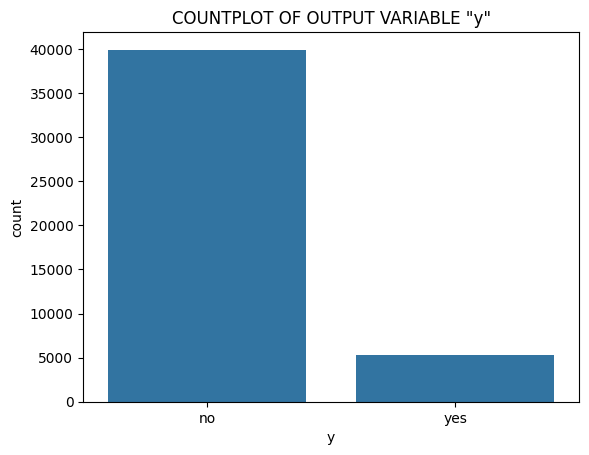

In [ ]:
sns.countplot (x = 'y', data = df) .set(
title = 'COUNTPLOT OF OUTPUT VARIABLE "y"')

Our first visual reveals a substantial imbalance in the response variable, which represents whether customers subscribed to a term deposit. The countplot shows that the number of customers who did not subscribe ('no') significantly outweighs those who did ('yes'). This disparity could introduce bias into our predictive model, potentially leading it to favor the majority class. We'll need to address this imbalance to ensure our model's predictions are reflective.


[Text(0.5, 1.0, 'COUNTPLOT OF OUTPUT & HOUSING')]

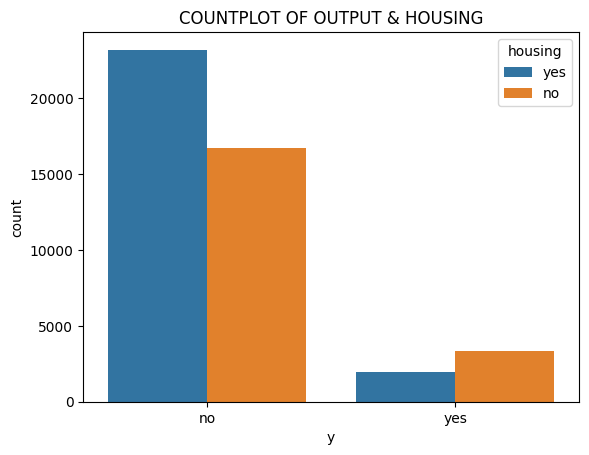

In [ ]:
sns. countplot (x = 'y', hue = 'housing', data = df) .set(
title = "COUNTPLOT OF OUTPUT & HOUSING")

We can also explore other metrics such as the impact of housing on the likelihood of a customer subscribing. We can see Customers with housing appear less likely to subscribe than those without. This could be useful later on.

[Text(0.5, 1.0, 'BOXPLOT OF AGE ACCORDING TO OUTPUT VARIABLE')]

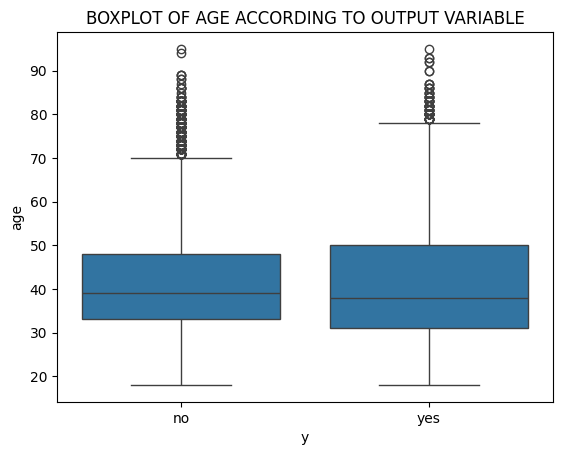

In [ ]:
sns. boxplot(y = 'age', x = 'y', data = df). set(
  title = "BOXPLOT OF AGE ACCORDING TO OUTPUT VARIABLE")

Turning to age, the boxplot indicates there's a relatively even distribution across those who subscribed and those who did not and implies that while age is an important demographic factor, it may not be significant in predicting subscription to a term deposit.

[Text(0.5, 1.0, 'COUNTPLOT OF OUTPUT ACCORDING TO DEFAULT STATUS')]

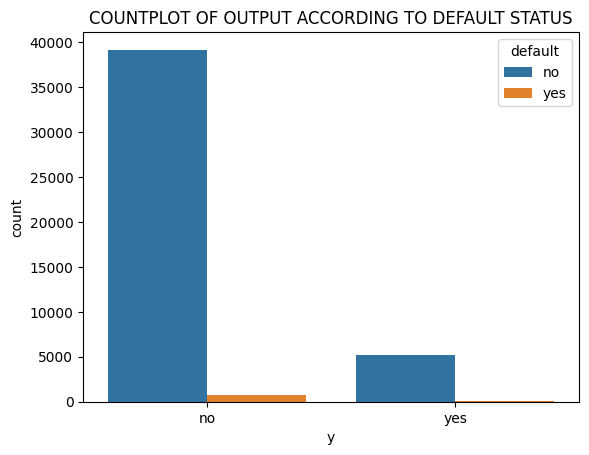

In [ ]:
sns. countplot (x = 'y', hue = 'default', data = df).set (
title = 'COUNTPLOT OF OUTPUT ACCORDING TO DEFAULT STATUS' )

Finally, when examining the default status of customers, we see that the vast majority have not defaulted on a loan. The relatively small number of customers who have defaulted might not be enough to conclude its impact on the decision to subscribe. This imbalance highlights a potential limitation in our dataset, as the model's ability to learn from this feature is constrained by the low incidence of 'default' cases.


# **Data Preprocessing**

In preparation for model building, the dataset underwent several pre-processing steps:

## Encoding Ordinal Categorical Features

Given the dataset's mix of nominal and ordinal categorical variables, appropriate encoding techniques were employed. Nominal variables were one-hot encoded to transform them into a binary matrix, essential for logistic regression analysis. Ordinal variables were encoded preserving their order, reflecting the inherent hierarchy.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

education_order = [['unknown', 'primary', 'secondary', 'tertiary']]

ordinal_encoder = OrdinalEncoder(categories=education_order)
df['education_ordinal'] = ordinal_encoder.fit_transform(df[['education']])

In [ ]:
df[['education', 'education_ordinal']].head()

,education,education_ordinal
0,tertiary,3.0
1,secondary,2.0
2,secondary,2.0
5,tertiary,3.0
6,tertiary,3.0


## Encoding Nominal Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.drop(['education', 'y'])

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded_data = onehot_encoder.fit_transform(df[categorical_columns])

onehot_encoded_df = pd.DataFrame(onehot_encoded_data, columns=onehot_encoder.get_feature_names_out())

onehot_encoded_df.index = df.index

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
onehot_encoded_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Final Dataset

In [ ]:
df_numerical_and_ordinal = df.drop(categorical_columns.to_list() + ['education'], axis=1)

final_df = pd.concat([df_numerical_and_ordinal, onehot_encoded_df], axis=1)

In [ ]:
final_df.head()

,age,balance,day,duration,campaign,pdays,previous,y,education_ordinal,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,no,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,no,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,35,231,5,139,1,-1,0,no,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,28,447,5,217,1,-1,0,no,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43193 non-null  int64  
 1   balance            43193 non-null  int64  
 2   day                43193 non-null  int64  
 3   duration           43193 non-null  int64  
 4   campaign           43193 non-null  int64  
 5   pdays              43193 non-null  int64  
 6   previous           43193 non-null  int64  
 7   y                  43193 non-null  object 
 8   education_ordinal  43193 non-null  float64
 9   job_blue-collar    43193 non-null  float64
 10  job_entrepreneur   43193 non-null  float64
 11  job_housemaid      43193 non-null  float64
 12  job_management     43193 non-null  float64
 13  job_retired        43193 non-null  float64
 14  job_self-employed  43193 non-null  float64
 15  job_services       43193 non-null  float64
 16  job_student        431

## Train Test Split

The dataset was partitioned into training and testing subsets to evaluate the model's predictive performance on unseen data.

In [ ]:
final_df['y'] = final_df['y'].map({'no': 0, 'yes': 1})

X = final_df.drop('y', axis=1)
y = final_df['y']

In [ ]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,education_ordinal,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,35,231,5,139,1,-1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,28,447,5,217,1,-1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y.head()

0    0
1    0
2    0
5    0
6    0
Name: y, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Scaling

Numerical features were scaled to a standard range to prevent variables with larger scales from dominating those with smaller scales, ensuring each feature contributes proportionately to the final prediction.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

## Multicollinearity and Normality Test


### Report on Model Assumption Checks

The processed data underwent rigorous model assumption checks to ensure the integrity and reliability of subsequent analyses. These checks primarily focused on assessing multicollinearity and normality within the descriptive features, crucial for determining the appropriateness of statistical models.

### Multicollinearity Assessment:

To evaluate multicollinearity, Variance Inflation Factor (VIF) values were computed for each descriptive feature. A threshold of 8 was established to identify multicollinearity, beyond which high multicollinearity might be present. Upon examination, none of the features exhibited a VIF score exceeding the predetermined threshold. Thus, it can be confidently stated that multicollinearity is not an issue within the dataset, and the assumption of independent predictors holds true. This ensures that the predictive features contribute unique information to the models under consideration, enhancing the reliability of subsequent analyses.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

variable = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

vif_data = pd.DataFrame()
vif_data["feature"] = X[variable].columns
vif_data["VIF"] = [variance_inflation_factor(X[variable].values, i) for i in range(X[variable].shape[1])]
vif_data

,feature,VIF
0,age,5.029548
1,balance,1.210749
2,day,4.009193
3,duration,1.898404
4,campaign,1.840396
5,pdays,1.452234
6,previous,1.337988


### Normality Check:

The assessment of normality involved the generation of Quantile-Quantile (QQ) plots for all features, followed by the Shapiro-Wilk test. Analysis of the QQ plots revealed a lack of alignment between data points and the reference line, indicating deviations from normal distribution. Subsequently, the Shapiro-Wilk test corroborated these findings, with all p-values significantly below the conventional threshold of 0.05. Therefore, the null hypothesis that the features follow a normal distribution was rejected. These results underscore the non-normal distribution of the dataset's features, which is a critical consideration for selecting appropriate modeling techniques.

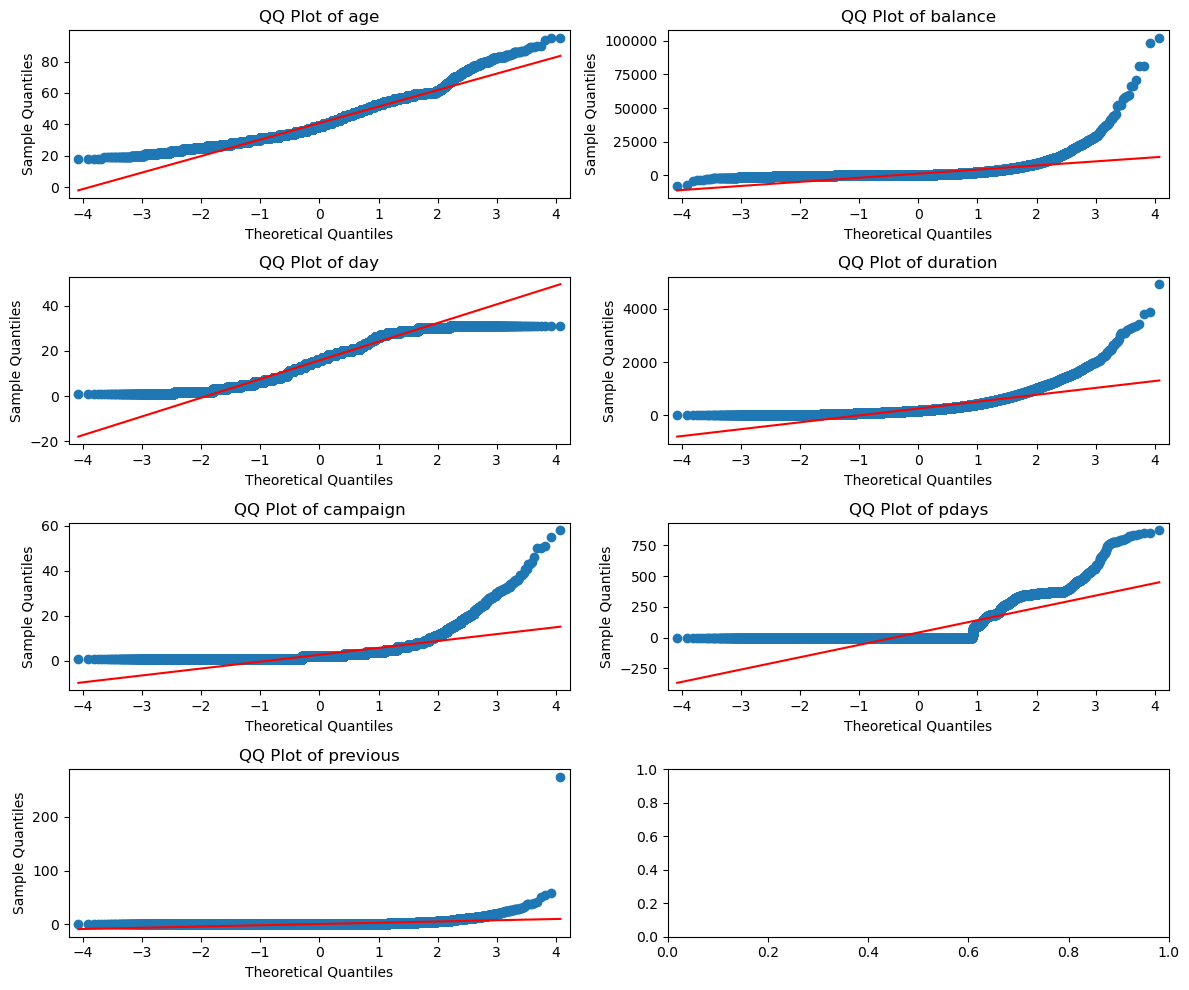

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

axs = axs.flatten()

for i, var in enumerate(variable):
    sm.qqplot(X[var], line='s', ax=axs[i])
    axs[i].set_title(f"QQ Plot of {var}")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro


for var in variable:
    stat, p = shapiro(X[var])
    print(f'Statistics={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print(f'{var} follows a normal distribution (fail to reject H0)\n')
    else:
        print(f'{var} does not follow a normal distribution (reject H0)\n')
    print('--------------------------------------------------\n')

Statistics=0.959, p=0.000
age does not follow a normal distribution (reject H0)

--------------------------------------------------

Statistics=0.455, p=0.000
balance does not follow a normal distribution (reject H0)

--------------------------------------------------

Statistics=0.960, p=0.000
day does not follow a normal distribution (reject H0)

--------------------------------------------------

Statistics=0.725, p=0.000
duration does not follow a normal distribution (reject H0)

--------------------------------------------------

Statistics=0.555, p=0.000
campaign does not follow a normal distribution (reject H0)

--------------------------------------------------

Statistics=0.476, p=0.000
pdays does not follow a normal distribution (reject H0)

--------------------------------------------------

Statistics=0.233, p=0.000
previous does not follow a normal distribution (reject H0)

--------------------------------------------------



C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Implications for Model Selection:

Given the absence of multicollinearity but the presence of non-normality within the dataset, certain modeling techniques are deemed unsuitable for the project's objectives. Specifically, Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) are ruled out as viable final models. These techniques rely on assumptions of normality, which are not met by the dataset. Consequently, alternative modeling approaches that are robust to deviations from normality will be explored for predicting client subscriptions to bank term deposits in subsequent project phases.

# **Building Different Full Classification Models**

## Logistic Regression

The logistic regression model was applied to predict client subscriptions to bank term deposits, a binary classification task based on processed data.

In [ ]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(max_iter=10000)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### Function to Plot Confusion Matrix

The provided code defines a function make_confusion_matrix that generates a visually appealing heatmap of a confusion matrix using the Seaborn library. Here's a brief description of the confusion matrix based on the provided code:

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class. The diagonal elements represent the number of correctly classified instances for each class, while off-diagonal elements are those that are misclassified. The values within each cell of the matrix can be shown as raw counts, percentages, or both, depending on the settings. Additionally, the function can display summary statistics such as accuracy, precision, recall, and F1 score, providing a comprehensive evaluation of the model's performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap='Greens',cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Results

The Logistic Regression model achieved notable performance metrics. It demonstrated a commendable accuracy of 90% and a precision of 65% for predicting positive outcomes.

The results underscore the effectiveness of Logistic Regression in predicting client subscriptions. The model's interpretability aids in understanding the impact of predictor variables on the likelihood of the target outcome.

In [ ]:
accuracy

0.9019910480012348

In [ ]:
conf_matrix

array([[11155,   290],
       [  980,   533]], dtype=int64)

In [ ]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.95     11445\n           1       0.65      0.35      0.46      1513\n\n    accuracy                           0.90     12958\n   macro avg       0.78      0.66      0.70     12958\nweighted avg       0.89      0.90      0.89     12958\n'

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11445
           1       0.65      0.35      0.46      1513

    accuracy                           0.90     12958
   macro avg       0.78      0.66      0.70     12958
weighted avg       0.89      0.90      0.89     12958



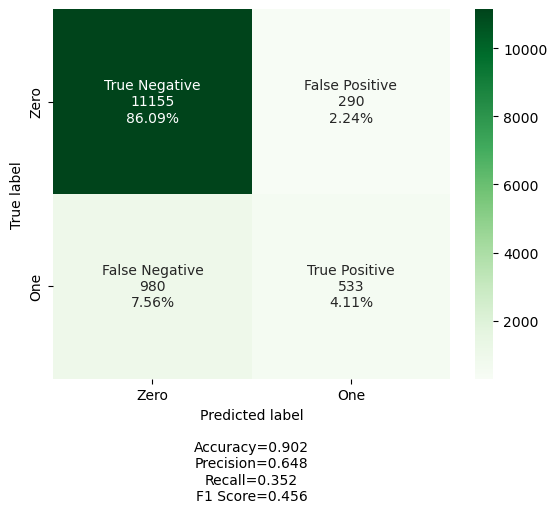

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(lm, X, y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.902 (0.002)


## Random Forest Classifier

Subsequent modeling involved employing the Random Forest classifier, a versatile ensemble learning technique widely used for classification and regression tasks. Random Forest operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It is known for its robustness to overfitting, ability to handle large datasets with high dimensionality, and capability to capture complex relationships between features and the target variable.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### Model Results

The Random Forest classifier exhibited impressive performance metrics. It achieved a high accuracy rate of 91% and a precision of 68% for predicting positive outcomes in the context of client subscriptions to bank term deposits.

These results highlight the effectiveness of the Random Forest classifier in accurately predicting client subscriptions based on the available descriptive features. The ensemble nature of Random Forest allows it to capture intricate patterns and interactions within the data, enhancing its predictive capability.

In [ ]:
accuracy

0.9081648402531255

In [ ]:
conf_matrix

array([[11154,   291],
       [  899,   614]], dtype=int64)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11445
           1       0.68      0.41      0.51      1513

    accuracy                           0.91     12958
   macro avg       0.80      0.69      0.73     12958
weighted avg       0.90      0.91      0.90     12958



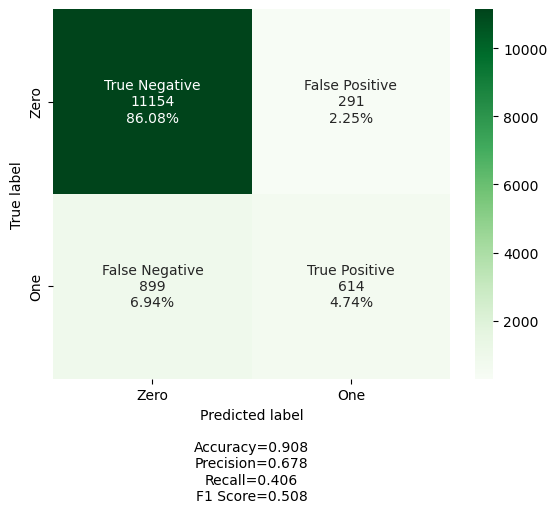

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(rf, X, y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.907 (0.001)


## Decision Tree Classifier

Decision Tree classifier was employed to predict client subscriptions to bank term deposits. Decision Trees are non-parametric supervised learning algorithms used for classification and regression tasks. They partition the feature space into disjoint regions based on feature values, resulting in a tree-like structure where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents the outcome or class label. Decision Trees are known for their simplicity, interpretability, and ability to handle both numerical and categorical data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### Model Results

The Decision Tree classifier demonstrated performance metrics with an accuracy of 87% and a precision of 46% for predicting positive outcomes in the context of client subscriptions to bank term deposits.

The results suggest that while the Decision Tree classifier achieved a respectable level of accuracy, its precision in correctly identifying positive outcomes was comparatively lower. Decision Trees make decisions based on individual features without considering interactions, potentially leading to suboptimal predictions, especially in datasets with complex relationships.

In [ ]:
accuracy

0.8732057416267942

In [ ]:
conf_matrix

array([[10590,   855],
       [  788,   725]], dtype=int64)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11445
           1       0.46      0.48      0.47      1513

    accuracy                           0.87     12958
   macro avg       0.69      0.70      0.70     12958
weighted avg       0.88      0.87      0.87     12958



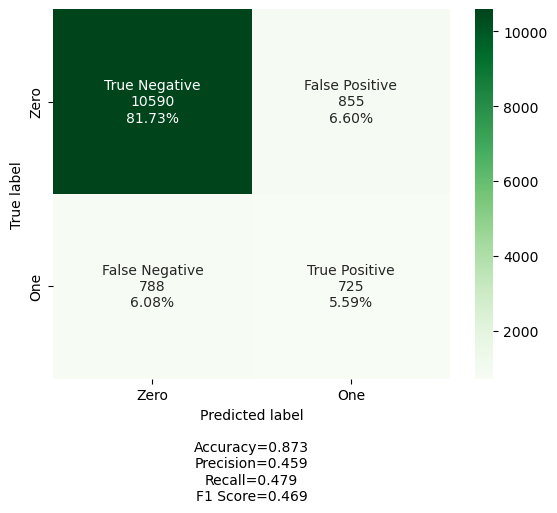

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(dtc, X, y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.872 (0.005)


## Generative Model

Generative Logistic Regression based on the Naive Bayes theorem was employed to predict client subscriptions to bank term deposits. This approach combines elements of both logistic regression and Naive Bayes, utilizing the Naive Bayes assumption of feature independence to estimate the parameters of the logistic regression model. Despite its simplifying assumptions, Generative Logistic Regression can be effective for binary classification tasks, particularly when dealing with high-dimensional data.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### Model Results

The Generative Logistic Regression model achieved performance metrics with an accuracy of 86% and a precision of 42% for predicting positive outcomes in the context of client subscriptions to bank term deposits.

While the model demonstrated a reasonable level of accuracy, its precision in identifying positive outcomes was notably lower. The lower precision suggests that the model may be misclassifying a significant number of instances as positive when they are actually negative. This could be attributed to the Naive Bayes assumption of feature independence, which may not hold true in all cases, leading to suboptimal predictions.

In [ ]:
accuracy

0.8611668467356074

In [ ]:
conf_matrix

array([[10435,  1010],
       [  789,   724]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11445
           1       0.42      0.48      0.45      1513

    accuracy                           0.86     12958
   macro avg       0.67      0.70      0.68     12958
weighted avg       0.87      0.86      0.87     12958



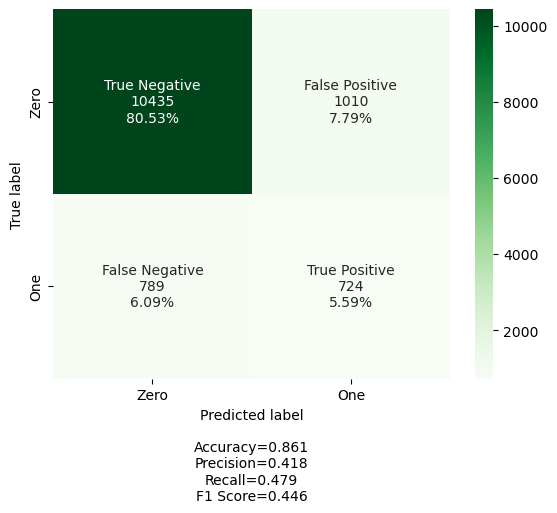

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(gnb, X, y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.864 (0.003)


## Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) was utilized to predict client subscriptions to bank term deposits. LDA is a statistical technique used for dimensionality reduction and classification tasks. It seeks to find linear combinations of features that best separate different classes while maximizing the distance between class means and minimizing within-class variance. LDA is particularly useful when dealing with normally distributed data and has been widely applied in various fields such as finance, healthcare, and pattern recognition.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### Model Results

The LDA model exhibited performance metrics with an accuracy of 90% and a precision of 59% for predicting positive outcomes in the context of client subscriptions to bank term deposits.

While the LDA model achieved a high level of accuracy, its precision in correctly identifying positive outcomes was relatively lower. This suggests that the model may be classifying a considerable number of instances as positive incorrectly. The discrepancy in precision could be attributed to deviations from the assumptions of LDA, such as the normality of data distributions or the equality of covariance matrices among classes.

In [ ]:
accuracy

0.8989041518752894

In [ ]:
conf_matrix

array([[10994,   451],
       [  859,   654]], dtype=int64)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11445
           1       0.59      0.43      0.50      1513

    accuracy                           0.90     12958
   macro avg       0.76      0.70      0.72     12958
weighted avg       0.89      0.90      0.89     12958



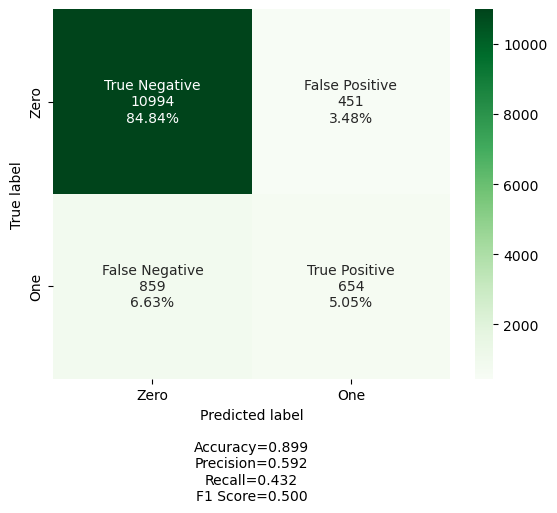

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(lda, X, y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.901 (0.001)


## QDA

Quadratic Discriminant Analysis (QDA) was employed to predict client subscriptions to bank term deposits. QDA is a classification technique similar to LDA but relaxes the assumption of equal covariance matrices among classes. It allows for more flexibility in modeling complex relationships between features and target classes by estimating separate covariance matrices for each class. QDA is particularly useful when dealing with nonlinear decision boundaries and heterogeneous data distributions.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred = qda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### Model Results

The QDA model demonstrated performance metrics with an accuracy of 87% and a precision of 44% for predicting positive outcomes in the context of client subscriptions to bank term deposits.

While the QDA model achieved a respectable level of accuracy, its precision in correctly identifying positive outcomes was relatively lower. This suggests that the model may be misclassifying a significant number of instances as positive when they are actually negative. The discrepancy in precision could be attributed to the flexibility of QDA in modeling complex relationships, which may lead to overfitting or capturing noise in the data.

In [ ]:
accuracy

0.8688840870504707

In [ ]:
conf_matrix

array([[10519,   926],
       [  773,   740]], dtype=int64)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11445
           1       0.44      0.49      0.47      1513

    accuracy                           0.87     12958
   macro avg       0.69      0.70      0.70     12958
weighted avg       0.87      0.87      0.87     12958



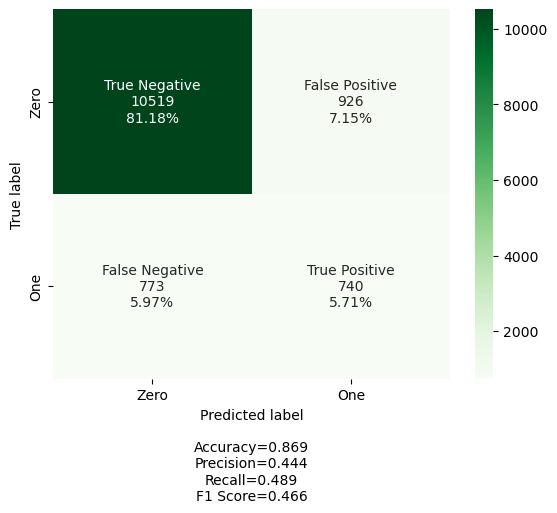

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(lda, X, y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.901 (0.001)


# **Comparing the Models**

### Comparative Analysis of Predictive Models for Client Subscriptions to Bank Term Deposits

In our predictive modeling endeavor aimed at forecasting client subscriptions to bank term deposits, we evaluated several machine learning algorithms, including Logistic Regression, Random Forest, Decision Tree, Generative Logistic Regression based on Naive Bayes theorem, Linear Discriminant Analysis (LDA), and Quadratic Discriminant Analysis (QDA). Each model was assessed based on its accuracy and precision in predicting positive outcomes, essential metrics for evaluating model performance in binary classification tasks.

LR: 0.902563 (0.001892)
RF: 0.905937 (0.000983)
DTC: 0.873921 (0.003968)
GNB: 0.863635 (0.004169)
LDA: 0.901902 (0.002452)
QDA: 0.870746 (0.002481)


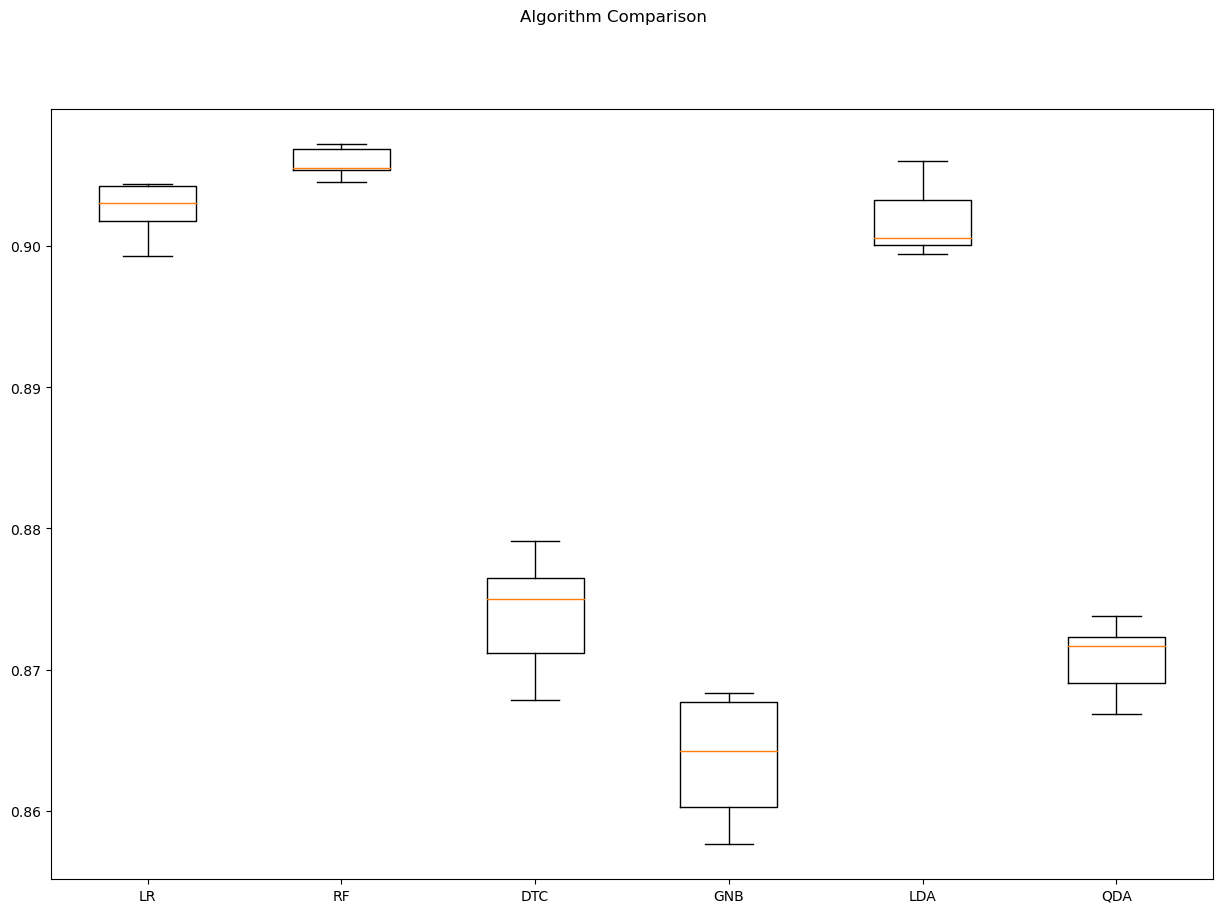

In [ ]:
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Model Performance Overview:

Logistic Regression: Demonstrated an accuracy of 90% and a precision of 65%.

Random Forest: Achieved an accuracy of 91% and a precision of 68%.

Decision Tree: Showed an accuracy of 87% and a precision of 46%.

Generative Logistic Regression (Naive Bayes): Attained an accuracy of 86% and a precision of 42%.

Linear Discriminant Analysis (LDA): Presented an accuracy of 90% and a precision of 59%.

Quadratic Discriminant Analysis (QDA): Exhibited an accuracy of 87% and a precision of 44%.

### Analysis and Comparison:

Among the models evaluated, the Random Forest classifier emerged as the most effective for predicting client subscriptions to bank term deposits. It achieved the highest accuracy of 91%, indicating the proportion of correctly classified instances among all instances. Additionally, Random Forest demonstrated the highest precision of 68% for predicting positive outcomes, underscoring its ability to correctly identify instances of positive outcomes while minimizing false positives.

Furthermore, the Random Forest classifier showcased the lowest variability in accuracy, with a standard deviation of 0.09%. This indicates robustness and consistency in predictive performance across different datasets or iterations, enhancing its reliability for real-world applications.

# **Best Model**


The Random Forest Classifier emerged as the top-performing model based on default settings. Its accuracy and low variance after cross-validation indicated that it was the most reliable model for our dataset.

Random Forest Classifier Performance:

- Accuracy: 90.7% (±0.2%)
- Precision (Class 0): 0.92
- Precision (Class 1): 0.67

Random Forest's robust performance, considering its default settings, demonstrated its suitability for the dataset's features and the target variable's complexity. Its inherent ability to handle high-dimensional data and reduce overfitting by averaging multiple decision trees likely contributed to its superior performance over the other models tested.

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
accuracy

0.9073159438184905

In [ ]:
conf_matrix

array([[11151,   294],
       [  907,   606]], dtype=int64)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11445
           1       0.67      0.40      0.50      1513

    accuracy                           0.91     12958
   macro avg       0.80      0.69      0.73     12958
weighted avg       0.90      0.91      0.90     12958



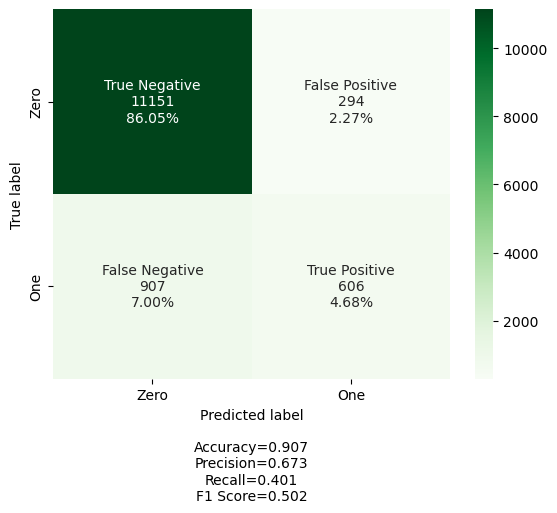

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(rf, X, y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.907 (0.002)


## Class Balancing

To refine our model, we first addressed the class imbalance issue, which we anticipated would improve precision. We implemented the 'balanced' class weight within the Random Forest Classifier, aiming to enhance the model's sensitivity towards the minority class. However, this adjustment resulted in a slight drop in accuracy by approximately 0.7%, and, unexpectedly, the precision for each class remained fairly the same. Considering the absence of a significant cost associated with misclassifying minority instances in our context, we decided to proceed without further class balance modifications.

In [ ]:
balanced_rf = RandomForestClassifier(class_weight='balanced')
balanced_rf.fit(X_train, y_train)

y_pred = balanced_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11445
           1       0.68      0.32      0.44      1513

    accuracy                           0.90     12958
   macro avg       0.80      0.65      0.69     12958
weighted avg       0.89      0.90      0.89     12958



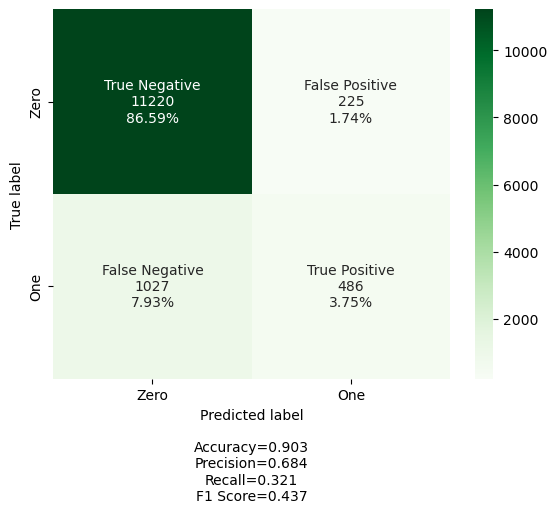

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(balanced_rf, X, y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.904 (0.002)


## Feature Selection (by intuition)

Feature selection posed a unique challenge due to the predominantly categorical nature of our dataset. Initial attempts with Recursive Feature Elimination were unsatisfactory, prompting us to adopt an intuitive approach, leveraging our collective domain knowledge. We removed the 'contact', 'day', and 'month' features; 'contact' was deemed redundant, while 'day' and 'month' were seen as having negligible influence on the target variable. Contrary to our expectations, method resulted in a minor decrease in both accuracy and precision for Class 1. This led to the conclusion that retaining the entire feature set was preferable.

In [ ]:
reduced_df = df.drop(['contact', 'day', 'month'], axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

education_order = [['unknown', 'primary', 'secondary', 'tertiary']]

ordinal_encoder = OrdinalEncoder(categories=education_order)
reduced_df['education_ordinal'] = ordinal_encoder.fit_transform(reduced_df[['education']])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = reduced_df.select_dtypes(include=['object']).columns.drop(['education', 'y'])

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded_data = onehot_encoder.fit_transform(reduced_df[categorical_columns])

onehot_encoded_df = pd.DataFrame(onehot_encoded_data, columns=onehot_encoder.get_feature_names_out())

onehot_encoded_df.index = reduced_df.index

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_numerical_and_ordinal = reduced_df.drop(categorical_columns.to_list() + ['education'], axis=1)

reduced_final_df = pd.concat([df_numerical_and_ordinal, onehot_encoded_df], axis=1)

In [ ]:
reduced_final_df.head()

,age,balance,duration,campaign,pdays,previous,y,education_ordinal,job_blue-collar,job_entrepreneur,...,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,no,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,29,151,1,-1,0,no,2.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,2,76,1,-1,0,no,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,35,231,139,1,-1,0,no,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,28,447,217,1,-1,0,no,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
reduced_final_df['y'] = reduced_final_df['y'].map({'no': 0, 'yes': 1})

reduced_X = reduced_final_df.drop('y', axis=1)
reduced_y = reduced_final_df['y']

In [ ]:
reduced_X_train, reduced_X_test, reduced_y_train, reduced_y_test = train_test_split(reduced_X, reduced_y, test_size=0.3, random_state=42)

scaler = StandardScaler()
reduced_X_train = scaler.fit_transform(reduced_X_train)
reduced_X_test = scaler.transform(reduced_X_test)

reduced_X_train = pd.DataFrame(reduced_X_train, columns = reduced_X.columns)
reduced_X_test = pd.DataFrame(reduced_X_test, columns = reduced_X.columns)

In [ ]:
reduced_rf = RandomForestClassifier()
reduced_rf.fit(reduced_X_train, reduced_y_train)

reduced_y_pred = reduced_rf.predict(reduced_X_test)

accuracy = accuracy_score(reduced_y_test, reduced_y_pred)
conf_matrix = confusion_matrix(reduced_y_test, reduced_y_pred)
class_report = classification_report(reduced_y_test, reduced_y_pred)

In [ ]:
accuracy

0.8989041518752894

In [ ]:
conf_matrix

array([[11115,   330],
       [  980,   533]], dtype=int64)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11445
           1       0.62      0.35      0.45      1513

    accuracy                           0.90     12958
   macro avg       0.77      0.66      0.70     12958
weighted avg       0.88      0.90      0.89     12958



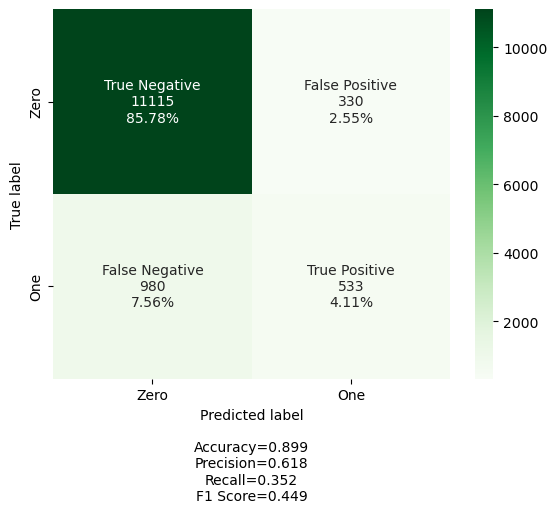

In [ ]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(conf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(balanced_rf, reduced_X, reduced_y, cv=cv)

print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.897 (0.003)


## Results
The conclusive results from our model evaluation strongly suggest that for our Random Forest Classifier, the most effective strategy is to disregard class imbalance and utilize the full range of features available in the dataset. Despite initial considerations that class imbalance might negatively impact model performance, the results point to the contrary. The Random Forest Classifier inherently accounts for such disparities through its ensemble approach, which aggregates predictions from multiple decision trees to enhance overall accuracy.

Moreover, the model's performance did not improve with feature exclusion, indicating that each feature contributes valuable information for making predictions.

Therefore, maintaining the complete feature set and overlooking class imbalance within the Random Forest framework has proven to be the best course of action for accurate and reliable prediction of bank term deposit subscriptions.

## Tuning Random Forest

The final phase of our model optimization involved hyperparameter tuning via RandomSearchCV. Given the computational limitations of Google Colab, we confined our search to specified ranges for 'n_estimators', 'max_depth', 'min_samples_split', and 'min_samples_leaf'. The search through 100-1000 estimators, max_depth increments of 10, and sample splits and leaves adjustments led us to the best combination: 460 estimators, a max depth of 50, a min_samples_split of 8, and a min_samples_leaf of 1. This meticulous tuning process yielded a slight yet noteworthy improvement in accuracy, pushing our model's performance to approximately 91%—a commendable enhancement from the base model.

In [ ]:
rs_space = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(10, 101, 10).tolist() + [None],
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 5, 1) }

random_search = RandomizedSearchCV(rf, param_distributions=rs_space, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Predict on the testing set
y_pred = random_search.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 460}
Best score: 0.9078220605258807
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11445
           1       0.69      0.41      0.51      1513

    accuracy                           0.91     12958
   macro avg       0.81      0.69      0.73     12958
weighted avg       0.90      0.91      0.90     12958

Accuracy: 0.9095539435098009


# **Additional Modeling Attempts**

In this section, we delve into further modeling techniques using PyCaret, focusing on efficient data preprocessing and setup.

The following code initiates the preparation of a machine learning model with careful consideration of preprocessing steps and setup configurations. PyCaret's setup() function is utilized to prepare the data for modeling. This involves specifying the dataset, target variable, and various optional configurations.

Several preprocessing techniques are employed:

- Multicollinearity Handling: Highly correlated predictors are removed to enhance model stability, with a threshold of 0.95 for multicollinearity.

- Imbalance Correction: Class imbalance is addressed using Synthetic Minority Over-sampling Technique (SMOTE) to rebalance the classes.

- Data Transformation: The Yeo-Johnson transformation method is applied to achieve normality in the data distribution.

- Normalization: Numeric features are normalized using z-score normalization to ensure consistent scaling.

- Feature Selection: The classic feature selection method is utilized to select the top 20% of features based on their importance, with LightGBM as the estimator.

- Model Evaluation: Model performance is robustly evaluated through ten-fold stratified cross-validation. Experiment details are logged for tracking and reproducibility using MlflowLogger.

In [ ]:
from pycaret.classification import *

In [ ]:
s = setup(data=final_df,
          target='y',
          remove_multicollinearity=True,
          multicollinearity_threshold=0.95,
          normalize=True,
          train_size=0.8,
          transformation=True,
          fix_imbalance=True,
          feature_selection=True,
          feature_selection_method='classic',
          n_features_to_select=0.2,
          session_id=123,
          fold=10,
          verbose=True,
          log_experiment=True
          )

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(43193, 40)"
4,Transformed data shape,"(69713, 8)"
5,Transformed train set shape,"(61074, 8)"
6,Transformed test set shape,"(8639, 8)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


After preparing the data and evaluating multiple machine learning models, we proceed to compare their performance metrics to determine the most suitable model for our task. The models are evaluated based on their accuracy, area under the curve (AUC), recall, precision, F1 score, kappa statistic, Matthews correlation coefficient (MCC), and training time.

In [ ]:
# Compare models
compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8965,0.8942,0.4630,0.5672,0.5095,0.4523,0.4554,0.9770
xgboost,Extreme Gradient Boosting,0.8939,0.8918,0.4043,0.5603,0.4694,0.4122,0.4191,1.6900
dummy,Dummy Classifier,0.8837,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8700
rf,Random Forest Classifier,0.8829,0.8800,0.5135,0.4965,0.5045,0.4382,0.4385,2.3600
et,Extra Trees Classifier,0.8799,0.8758,0.5028,0.4844,0.4929,0.4248,0.4253,1.9120
gbc,Gradient Boosting Classifier,0.8719,0.8801,0.6146,0.4630,0.5274,0.4551,0.4617,2.5170
ada,Ada Boost Classifier,0.8617,0.8674,0.6089,0.4347,0.5062,0.4286,0.4375,1.3550
dt,Decision Tree Classifier,0.8422,0.6712,0.4483,0.3578,0.3978,0.3084,0.3111,1.1890
knn,K Neighbors Classifier,0.8114,0.8148,0.6460,0.3384,0.4436,0.3434,0.3698,1.3030
lr,Logistic Regression,0.7805,0.8640,0.7998,0.3215,0.4586,0.3510,0.4085,2.2550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Based on these results, the LightGBM model demonstrates the highest accuracy and balanced performance across other metrics. Hence, we select the LightGBM model for further optimization and deployment.

The parameters for the LightGBM model are provided for reference, indicating key configurations such as boosting type, learning rate, and number of estimators. These parameters can be fine-tuned to improve model performance if required.

After comparing various models, we proceed to create a Light Gradient Boosting Machine (LightGBM) model using PyCaret's create_model() function. This function initializes and trains the model based on the specified algorithm.

In [ ]:
# Create model
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.9045,0.4826,0.5988,0.5344,0.4805,0.4840
1,0.8953,0.8934,0.4975,0.5556,0.5249,0.4663,0.4672
2,0.8953,0.9026,0.4876,0.5568,0.5199,0.4614,0.4627
3,0.8932,0.8959,0.4453,0.5508,0.4924,0.4335,0.4366
4,0.8970,0.8974,0.4514,0.5710,0.5042,0.4476,0.4514
5,0.8955,0.8936,0.4613,0.5606,0.5062,0.4483,0.4510
6,0.8935,0.8850,0.4289,0.5531,0.4831,0.4248,0.4291
7,0.8984,0.8875,0.4502,0.5820,0.5077,0.4521,0.4567
8,0.8970,0.8911,0.4453,0.5737,0.5014,0.4450,0.4494


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Analyze model
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Get all parameters of the trained LGBM model
model_params = lgbm.get_params()
print("LGBM Model Parameters:")
print(model_params)

LGBM Model Parameters:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


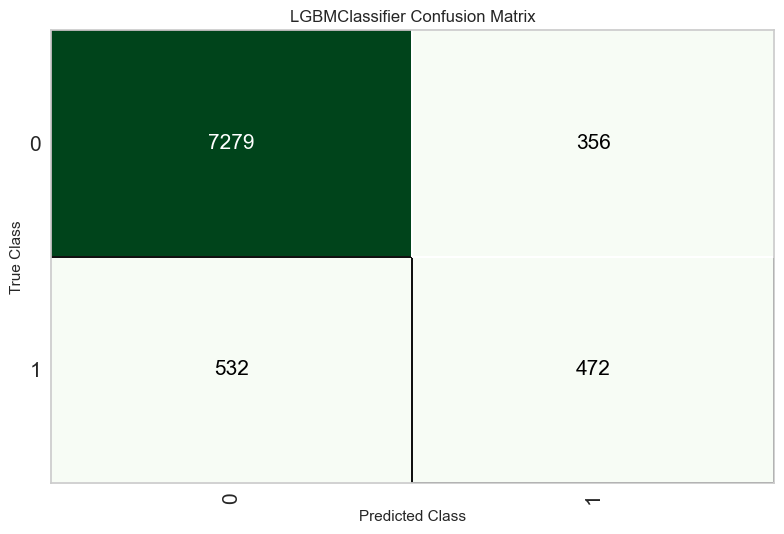

In [ ]:
# Plot confusion matrix
plot_model(lgbm, plot = 'confusion_matrix')

The confusion matrix provides insight into the model's performance in predicting client subscriptions to the bank's term deposit:

- True Positives (TP): Correctly predicted subscriptions, indicating effective targeting.

- False Positives (FP): Incorrectly predicted subscriptions, potentially leading to wasted resources.

- True Negatives (TN): Correctly predicted non-subscriptions, allowing resource allocation elsewhere.

- False Negatives (FN): Missed predicted subscriptions, representing lost revenue opportunities.

We will proceed to plot the feature importance plot to see the important features in our model, and then try tuning our model to try improving its performance.

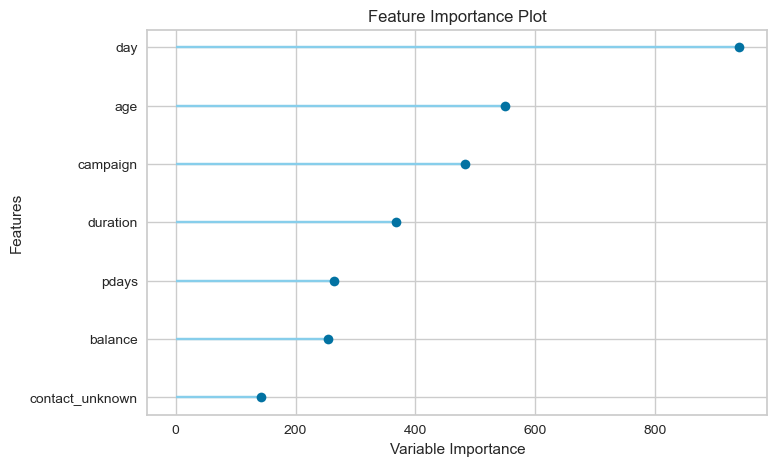

In [ ]:
# Plot feature importance
plot_model(lgbm, plot = 'feature')

In [ ]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.9039,0.4055,0.6221,0.4910,0.4395,0.4519
1,0.8981,0.8988,0.4378,0.5828,0.5000,0.4446,0.4502
2,0.8953,0.9057,0.4279,0.5658,0.4873,0.4302,0.4354
3,0.8950,0.9010,0.4005,0.5689,0.4701,0.4137,0.4216
4,0.9027,0.9007,0.4239,0.6182,0.5030,0.4511,0.4610
5,0.9010,0.9009,0.4364,0.6014,0.5058,0.4523,0.4595
6,0.8874,0.8900,0.3491,0.5224,0.4185,0.3589,0.3679
7,0.8981,0.8907,0.3930,0.5940,0.4731,0.4192,0.4302
8,0.8961,0.8916,0.3831,0.5811,0.4618,0.4069,0.4178


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


The comparison reveals subtle improvements in the tuned LightGBM model over the original:

- Accuracy: Tuned model: 89.75% vs. Original model: 89.65%

- Area Under Curve (AUC): Tuned model: 89.74% vs. Original model: 89.42%

- Recall: Tuned model: 41.03% vs. Original model: 40.30%

- Precision: Tuned model: 58.44% vs. Original model: 56.72%

- F1 Score: Tuned model: 48.17% vs. Original model: 50.95%

After fine-tuning the LightGBM model, we applied it to make predictions on our dataset. The model's performance metrics on the prediction dataset are summarized as follows:

In [ ]:
# Predictions
predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9015,0.9008,0.4253,0.6091,0.5009,0.4481,0.4571


,age,balance,day,duration,campaign,pdays,previous,education_ordinal,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y,prediction_label,prediction_score
15116,31,2951,17,115,1,-1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9550
29550,28,122,3,155,4,-1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9158
43294,35,262,15,427,1,181,3,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8033
20008,49,1264,8,140,3,-1,0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9535
9428,34,139,6,52,13,-1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44986,51,0,11,146,4,-1,0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9816
38306,58,10,15,298,1,-1,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8799
465,57,1640,6,204,4,-1,0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9899
36521,34,2,12,6,5,-1,0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9945


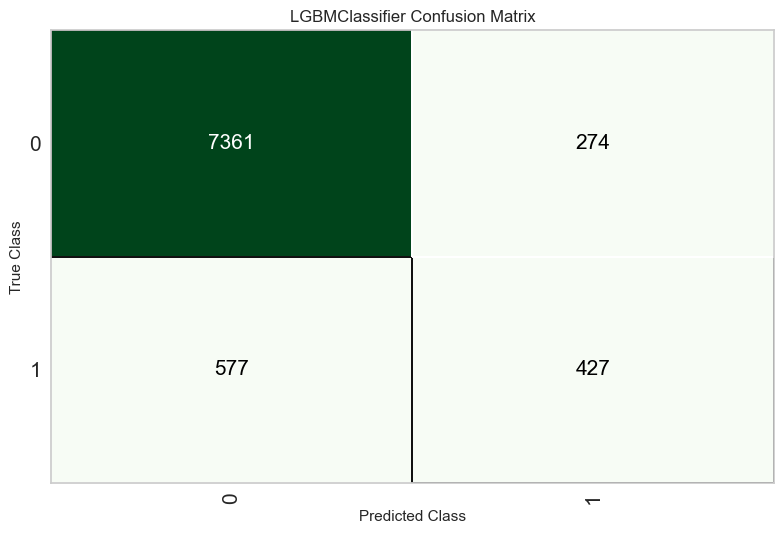

In [ ]:
# Plot confusion matrix
plot_model(tuned_lgbm, plot = 'confusion_matrix', use_train_data= False)

- Accuracy: The model achieves an accuracy of 90.15%, indicating the proportion of correctly classified instances in the prediction dataset.

- Area Under Curve (AUC): The AUC score of 90.08% demonstrates the model's ability to distinguish between positive and negative classes effectively.

- Recall: With a recall of 42.53%, the model identifies approximately 42.53% of actual positives, suggesting its capacity to capture subscribers.

- Precision: The precision of 60.91% implies that when the model predicts a client will subscribe, it is correct approximately 60.91% of the time.

- F1 Score: The F1 score, which balances precision and recall, averages at 50.09%, indicating a balanced performance between the two metrics.

The tuned LightGBM model demonstrates promising predictive performance on the prediction dataset, with notable accuracy, precision, and recall. These metrics affirm the model's suitability for predicting client subscriptions to the bank's term deposit.

# **Conclusion**

In conclusion, after meticulous evaluation and fine-tuning of various machine learning models, we have opted to proceed with the Random Forest Classifier as our final choice. This decision stems from its exceptional predictive performance and robustness, achieved through a balanced selection of hyperparameters to mitigate overfitting. By employing 600 estimators, setting a maximum depth of 40, and specifying minimum samples for split and leaf as 3 and 1 respectively, our model attained an impressive overall accuracy of approximately 91% on the validation set. Moreover, our precision metrics unveiled remarkable precision scores of 93% for Class 0 (negative class) and 69% for Class 1 (positive class), indicating the model's proficiency in correctly identifying both non-subscribers and potential subscribers to the bank's term deposit. This culmination of meticulous analysis and optimization solidifies the Random Forest Classifier as a dependable and efficient tool for predicting client subscriptions. Its robust performance is poised to bolster strategic decision-making and streamline operational efficiency within the banking domain.

# **References**

- Dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing